# Proyek Analisis  : E-Commerce Public Dataset

Nama : Mulia Parna Putri Sijabat </br>
Email : muliasijabat@gmail.com </br>
Id Dicoding : 1260376 </br>

# Menentukan Pertanyaan Bisnis

Melakukan analisa pada penjualan di e-commerce yang akan digunakan untuk melihat produk apa yang mendapatkan minat terbanyak dari pelanggan dan bagaimana kriteria pelanggan tersebut. Hal ini bertujuan agar kita dapat menyusun strategi pemasaran yang tepat untuk setiap segmentasi pelanggan tersebut.

Beberapa pertanyaan bisnis yang dapat kita ajukan :
1. Produk apa yang paling sedikit dan paling banyak terjual ?
2. Produk apa yang menghasilkan total penjualan terbesar dan terendah ?
3. Bagaimana keuntungan dari penjualan di bulan terakhir ?
4. Demografi pelanggan apa saja ?
5. Analisa RFM dari pelanggan tersebut ?

# Library

In [144]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Data Wragling

## Gathering Data

In [145]:
customer_df = pd.read_csv('Data/customers_dataset.csv')
order_item_df = pd.read_csv('Data/order_items_dataset.csv')
order_df = pd.read_csv('Data/orders_dataset.csv')
product_name_df = pd.read_csv('Data/product_category_name_translation.csv')
product_df = pd.read_csv('Data/products_dataset.csv')

### 1.customer_df

In [146]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Berikut adalah penjelasan dari masing-masing nama kolom:

1. customer_id = Nomor atau ID yang membedakannya dari pelanggan lain
2. customer_unique_id =  Nomor atau ID unik yang membedakannya dari pelanggan lain
3. customer_zip_code_prefix = Kode wilayah
4. customer_city = Kota dari pelanggan
5. customer_state = Negara bagian dari pelanggan

### 2.order_item_df

In [147]:
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Berikut adalah penjelasan dari masing-masing nama kolom:

1. order_id: Nomor atau ID unik yang membedakannya dari pesanan lain.
2. order_item_id: Identitas untuk mengidentifikasi item atau produk yang terkait dengan suatu pesanan
3. product_id: Untuk mengidentifikasi produk tertentu yang dipesan dalam sebuah pesanan
4. seller_id: Mengidentifikasi penjual atau toko yang menjual produk kepada pelanggan.
5. shipping_limit_date: Berisi tanggal batas waktu pengiriman pesanan.
6. price: Berisi harga produk atau harga total dari pesanan yang terkait
7. freight_value: Berisi biaya pengiriman atau biaya logistik yang terkait dengan pesanan. 

### 3.order_df

In [148]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Berikut adalah penjelasan dari masing-masing nama kolom:

1. order_id: Ini adalah ID unik untuk setiap pesanan.
2. customer_id: Merupakan ID unik pelanggan yang melakukan pesanan tersebut. 
3. order_status: Menunjukkan status pesanan.
4. order_purchase_timestamp: Waktu atau tanggal ketika pesanan dibuat atau diproses oleh pelanggan.
5. order_approved_at: Waktu atau tanggal ketika pesanan tersebut disetujui oleh sistem atau oleh penjual setelah pembayaran.
6. order_delivered_carrier_date: Tanggal ketika pesanan diserahkan kepada perusahaan pengiriman atau kurir.
7. order_delivered_customer_date: Tanggal ketika pesanan sampai kepada pelanggan atau penerima.
8. order_estimated_delivery_date: Tanggal perkiraan pengiriman pesanan.

### 4.product_name_df

In [149]:
product_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Berikut adalah penjelasan dari masing-masing nama kolom:

1. product_category_name = berisi nama kategori produk dalam Portugis
2. product_category_name_english = berisi nama kategori produk dalam Inggris

### 5.product_df

In [150]:
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Berikut adalah penjelasan dari masing-masing nama kolom:

1. product_id: Ini adalah kolom yang berisi ID atau identifikasi unik untuk setiap produk. 
2. product_category_name: Ini adalah kolom yang berisi nama kategori produk.
3. product_name_length: Kolom ini berisi panjang (jumlah karakter) dari nama produk. 
4. product_description_length: Ini adalah kolom yang berisi panjang (jumlah karakter) dari deskripsi produk. 
5. product_photos_qty: Kolom ini berisi jumlah foto atau gambar yang terkait dengan produk.
6. product_weight_g: Ini adalah kolom yang berisi berat produk dalam gram. 
7. product_length_cm: Kolom ini berisi panjang produk dalam sentimeter. 
8. product_height_cm: Ini adalah kolom yang berisi tinggi produk dalam sentimeter. 
9. product_width_cm: Kolom ini berisi lebar produk dalam sentimeter.

## Assessing Data

### 1.customer_df

In [151]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


semua data telah terisi.
Menghapus kolom yang tidak digunakan.

In [152]:
# melihat duplikat data
print('Data terduplikat', customer_df.duplicated().sum())

Data terduplikat 0


In [153]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### 2.order_item_df

In [154]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Terdapat kesalahan pada tipedata di kolom shipping_limit_date yang akan diubah menjadi datetime

In [155]:
print('Data terduplikat', order_item_df.duplicated().sum())

Data terduplikat 0


In [156]:
order_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### 3.order_df

In [157]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


1. Date_time : order_purchase_timestamp,  order_delivered_customer_date.
2. Hapus : order_approved_at, order_delivered_carrier_date, order_estimated_delivery_date.

In [158]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat banyak missing value pada dataframe ini

In [159]:
print('Data Terduplikat', order_df.duplicated().sum())

Data Terduplikat 0


In [160]:
order_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### 4.product_name_df

In [161]:
product_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [162]:
product_name_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [163]:
# Mengakses baris yang memiliki nilai NaN pada kolom 'category_name'
rows_with_nan = product_name_df[product_name_df['product_category_name_english'].isna()]
print(rows_with_nan)

Empty DataFrame
Columns: [product_category_name, product_category_name_english]
Index: []


In [164]:
print('Data terduplikat', product_name_df.duplicated().sum())

Data terduplikat 0


In [165]:
product_name_df.product_category_name_english.value_counts()

product_category_name_english
health_beauty                1
food                         1
fashion_sport                1
fashion_underwear_beach      1
construction_tools_safety    1
                            ..
luggage_accessories          1
cool_stuff                   1
fashion_shoes                1
audio                        1
security_and_services        1
Name: count, Length: 71, dtype: int64

In [166]:
product_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### 5.product_df

In [167]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


1. Terdapat banyak data kosong atau nan pa data tersebut. Mari kita cek berapa banyak data tersebut.
2. Menghapus kolom yang tidak diperlukan dalam proses analisa.
'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'

In [168]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [169]:
print('Data Terduplikat', product_df.duplicated().sum())

Data Terduplikat 0


In [170]:
product_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Dapat dilihat pada kolom product_weight_g minimal beratnya adalah 0 dan maksimal beratnya 40425.


## Cleaning Data

Berikut merupakan rangkumannya
1. Table customer_df : Menghapus kolom yang tidak digunakan.
2. Table order_item_df : shipping_limit_date (ubah data ke datetime)
3. Table order_df : tipe data yang tidak sesuai, hapus kolom yang tidak digunakan, terdapat missing value.
4. Table product_name_df : Aman
5. product_df : Missing value, hapus kolom yang tidak digunakan.

### 1.Membersihkan Data customer_df

In [171]:
customer_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [172]:
# menghapus kolom yang tidak digunakan dalam proses analisa

kolom = ['customer_unique_id', 'customer_zip_code_prefix']
customer_df = customer_df.drop(columns=kolom, axis=1)
customer_df.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


In [173]:
customer_df.customer_city.value_counts()

customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64

In [174]:
customer_df.isna().sum()

customer_id       0
customer_city     0
customer_state    0
dtype: int64

### 2.Membersihkan Data order_item_df

In [175]:
order_item_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [176]:
# mengapus kolom yang tidak digunakan dalam proses analisa

kolom = ['seller_id','shipping_limit_date','freight_value']
order_item_df = order_item_df.drop(columns=kolom, axis=1)
order_item_df.head()

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


In [177]:
order_item_df.isna().sum()

order_id         0
order_item_id    0
product_id       0
price            0
dtype: int64

In [178]:
order_item_df.duplicated().sum()

0

### 3.Membersihkan Data order_df

In [179]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [180]:
# menghapus kolom yang tidak digunakan dalam proses analisa

kolom = ['order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date']
order_df = order_df.drop(columns=kolom, axis=1)
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02


In [181]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2965
dtype: int64

Setelah menghapus kolom yang tidak dibutuhkan, Saya melakukan pengecekan missing value. Terdapat 2965 mising value pada kolom order_delivered_customer_date.

In [182]:
missing_order_delivered_customer_date= order_df[order_df['order_delivered_customer_date'].isna()]
missing_order_delivered_customer_date = missing_order_delivered_customer_date[['order_id', 'order_status']]
missing_order_delivered_customer_date.head()

,order_id,order_status
6,136cce7faa42fdb2cefd53fdc79a6098,invoiced
44,ee64d42b8cf066f35eac1cf57de1aa85,shipped
103,0760a852e4e9d89eb77bf631eaaf1c84,invoiced
128,15bed8e2fec7fdbadb186b57c46c92f2,processing
154,6942b8da583c2f9957e990d028607019,shipped


In [183]:
missing_order_delivered_customer_date.groupby(by='order_status').order_id.nunique().sort_values(ascending=False)

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_id, dtype: int64

Dari hasil tersebut kita bisa mengetahui bahwa 2965 missing values yang terdapat pada kolom order_delivered_customer_date. Untuk status order yang bersifat negatif (cancel dan unavailable) akan dihapus. Dan yang bersifat positif akan di isi dengan data pada kolom order_purchase_timestamp dimana data ini adalah data dimana dia melakukan transaksi tersebut.

In [184]:
# menghapus semua data yang berstatus canceled dan unavailable, karena kita hanya melakukan analisa untuk transaksi yang berhasil saja
order_df = order_df[(order_df['order_status'] != 'canceled') & (order_df['order_status'] != 'unavailable') & 
                    (order_df['order_status'] != 'created')]

In [185]:
# mengisi data order_delivered_customer_date yang bersatatus berdelivery dengan data order_purchase_timestamp
order_df['order_delivered_customer_date'] = order_df['order_delivered_customer_date'].fillna(order_df['order_purchase_timestamp'])

In [186]:
order_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
dtype: int64

Data sudah terisi dengan data yang sesuai

In [187]:
# Mengubah tipe data
kolom_dt = ['order_purchase_timestamp',  'order_delivered_customer_date']

for column in kolom_dt:
    order_df[column] = pd.to_datetime(order_df[column])

In [188]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98202 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98202 non-null  object        
 1   customer_id                    98202 non-null  object        
 2   order_status                   98202 non-null  object        
 3   order_purchase_timestamp       98202 non-null  datetime64[ns]
 4   order_delivered_customer_date  98202 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 4.5+ MB


In [189]:
order_df.order_status.value_counts()

order_status
delivered     96478
shipped        1107
invoiced        314
processing      301
approved          2
Name: count, dtype: int64

In [190]:
order_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
count,98202,98202,98202,98202,98202
unique,98202,98202,5,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN
freq,1,1,96478,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 01:42:11.984012800,2018-01-13 09:47:05.142787328
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-04 21:15:19
25%,NaN,NaN,NaN,2017-09-13 09:44:15.249999872,2017-09-24 16:50:09.500000
50%,NaN,NaN,NaN,2018-01-19 17:13:34,2018-02-01 21:28:11.500000
75%,NaN,NaN,NaN,2018-05-04 21:04:54.249999872,2018-05-15 17:20:52
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-10-17 13:22:46


### 4.Membersihkan Data product_df

In [191]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

menghapus data yang kosong pada kolom product_category_name.

In [192]:
product_df.dropna(subset=['product_category_name'], inplace=True)

In [193]:
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [194]:
# menghapus kolom yang tidak dibutuhkan dalam proses analisa data
kolom = ['product_name_lenght','product_description_lenght', 'product_photos_qty', 'product_weight_g',
         'product_length_cm', 'product_height_cm', 'product_width_cm']
product_df = product_df.drop(columns=kolom, axis=1)
product_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [195]:
product_df.isna().sum()

product_id               0
product_category_name    0
dtype: int64

In [196]:
product_df.duplicated().sum()

0

In [197]:
product_df.describe(include='all')

,product_id,product_category_name
count,32341,32341
unique,32341,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


Untuk tahap cleaning data sudah selesai.

# Exploratory Data Analysis

## 1.Data customers_df

In [198]:
customer_df.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


In [199]:
customer_df.describe(include='all')

,customer_id,customer_city,customer_state
count,99441,99441,99441
unique,99441,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,sao paulo,SP
freq,1,15540,41746


Untuk melihat demografi pelanggan disini saya mengabungkan dataframe geo_df dan customer_df

In [200]:
customer_df.columns

Index(['customer_id', 'customer_city', 'customer_state'], dtype='object')

In [201]:
customer_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [202]:
customer_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan cukup merata pada setiap kota. Pelanggan kita paling banyak berada di kota Sao Paolo, rio de janeiro, dan belo horizonte dengan jumlah masing-masing tiga pelanggan.

## 2.Data order_df

In [203]:
# melihat berapa lama hari yang dibutuhkan pelanggan setelah melakukan transaksi.
order_arrived_customer = order_df['order_delivered_customer_date'] - order_df['order_purchase_timestamp']
order_arrived_customer = order_arrived_customer.apply(lambda x: x.total_seconds())
order_df['order_arrived_customer'] =  round(order_arrived_customer/86400)

In [204]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_arrived_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,3.0


Dengan menambhakan kolom baru 'order_arrived_customer' kita dapat mengetahui berapa lama waktu yang diperlukan mulai dari pelanggan melakukan transaksi sampai barang tersebut sampai ke alamat pelanggan.

In [205]:
order_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_arrived_customer
count,98202,98202,98202,98202,98202,98202.000000
unique,98202,98202,5,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 01:42:11.984012800,2018-01-13 09:47:05.142787328,12.296287
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-04 21:15:19,0.000000
25%,NaN,NaN,NaN,2017-09-13 09:44:15.249999872,2017-09-24 16:50:09.500000,6.000000
50%,NaN,NaN,NaN,2018-01-19 17:13:34,2018-02-01 21:28:11.500000,10.000000
75%,NaN,NaN,NaN,2018-05-04 21:04:54.249999872,2018-05-15 17:20:52,15.000000
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-10-17 13:22:46,210.000000


Dapat dilihat bahwa maksimal pengiriman hingga pesanan sampai dialamat pelanggan adalah 210 hari dan minimum 0.

In [206]:
maksimum_pengiriman = order_df[order_df['order_arrived_customer'] >= 100]
maksimum_pengiriman.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_arrived_customer
1621,a4efaffc506a395c9cea7402b078c1e5,2020559b0ae9910898ef57a8159533ab,delivered,2018-01-17 10:50:09,2018-05-07 19:25:33,110.0
3077,8b7fd198ad184563c231653673e75a7f,3eddc75fe2314996f68ddcd89ddb5caf,delivered,2017-11-14 10:04:27,2018-02-27 18:05:08,105.0
3202,4f39a94d6e474819d898d6df7d394996,27a410dccb395b6ce45963874d158352,delivered,2017-04-28 16:28:03,2017-09-19 13:54:18,144.0
4666,b31c7dea63bb08f8cdd1ec32514ccf0b,2a351c540a0cbdd0d9c266626f6d3acc,delivered,2017-09-26 18:35:35,2018-02-05 21:25:43,132.0
10383,3602a80b09d914236f74c733631f3b8b,367000b9bd508db790e048df2f6d6af9,delivered,2018-01-31 20:38:38,2018-05-18 11:06:52,107.0


In [207]:
min_pengiriman = order_df[order_df['order_arrived_customer'] <= 0.0]
min_pengiriman.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_arrived_customer
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-11 12:22:08,0.0
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-04 16:44:48,0.0
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-03 17:44:42,0.0
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:22:03,0.0
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-10 11:33:07,0.0


## 3.Data order_item_df dan order_df

In [208]:
order_item_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'price'], dtype='object')

In [209]:
# menambahkan total_price = harga satuan * qty diorder
order_item_df['total_price'] = order_item_df['price'] * order_item_df['order_item_id']
order_item_df.tail(10)

,order_id,order_item_id,product_id,price,total_price
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,55.00,55.00
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,55.00,110.00
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,55.00,165.00
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,55.00,220.00
112644,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,119.85,119.85
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,299.99
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,350.00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,99.90
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,55.99
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,43.00,43.00


In [210]:
order_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_arrived_customer'],
      dtype='object')

In [211]:
# melakukan meger pada kedua data tersebut
all_order_df = order_df.merge(order_item_df, on='order_id', how='inner')
all_order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_arrived_customer,order_item_id,product_id,price,total_price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,8.0,1,87285b34884572647811a353c7ac498a,29.99,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,14.0,1,595fac2a385ac33a80bd5114aec74eb8,118.70,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,9.0,1,aa4383b373c6aca5d8797843e5594415,159.90,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,13.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,3.0,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,19.90


In [212]:
all_order_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
order_arrived_customer           0
order_item_id                    0
product_id                       0
price                            0
total_price                      0
dtype: int64

In [213]:
all_order_df.describe()

,order_purchase_timestamp,order_delivered_customer_date,order_arrived_customer,order_item_id,price,total_price
count,112101,112101,112101.000000,112101.000000,112101.000000,112101.000000
mean,2018-01-01 04:20:37.930893056,2018-01-13 10:34:20.314983680,12.219186,1.197349,120.377166,136.314384
min,2016-09-04 21:15:19,2016-09-04 21:15:19,0.000000,1.000000,0.850000,0.850000
25%,2017-09-13 23:13:16,2017-09-25 20:12:20,6.000000,1.000000,39.900000,45.000000
50%,2018-01-19 22:20:50,2018-02-01 22:51:48,10.000000,1.000000,74.900000,84.000000
75%,2018-05-04 17:51:51,2018-05-15 15:21:48,15.000000,1.000000,134.900000,149.900000
max,2018-09-03 09:06:57,2018-10-17 13:22:46,210.000000,21.000000,6735.000000,13440.000000
std,NaN,NaN,9.505740,0.704307,182.637401,216.166166


Dari sini kita dapat melihat value dari masing2 kolom dimana maksimal pengiriman 210 hari.

Dari data ini kita bisa mengetahui bahwa kota Sao Paulo, Curitiba dan Rio De Janero merupakan kota yang paling penjualnya.

## 4.Product_name_df dan product_df

In [214]:
product_name_df.sample(5)

,product_category_name,product_category_name_english
68,fraldas_higiene,diapers_and_hygiene
22,cool_stuff,cool_stuff
60,la_cuisine,la_cuisine
41,instrumentos_musicais,musical_instruments
12,papelaria,stationery


In [215]:
product_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


Pada tahap ini kita menggabungkan kedua dataframe tersebut, hal ini agar kita bisa mengetahui produk katergory tersebut dalam bahasa inggris atau bahasa yang lebih mudah dimengerti.

In [216]:
product_name_eng_df = product_df.merge(product_name_df, on='product_category_name',how='inner')
product_name_eng_df = product_name_eng_df.drop(columns='product_category_name')
product_name_eng_df.rename(columns={'product_category_name_english' : 'category_name'}, inplace=True)
product_name_eng_df.head(10)

,product_id,category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumery
5,828fe032935d7c1901682e5b6cc076c2,perfumery
6,bbaef2eadf31fe3ea6702077398be06c,perfumery
7,cd7701670288642f7be9437dec9034c1,perfumery
8,dc582e9ac5036846acfeeb3093b17aa7,perfumery
9,1f64ec386a6be322e71596931f5d2377,perfumery


In [217]:
product_name_eng_df.isna().sum()

product_id       0
category_name    0
dtype: int64

In [218]:
# Anggap 'product_name_eng_df' adalah DataFrame Anda
unique_categories = product_name_eng_df.groupby('category_name')['product_id'].nunique().reset_index()
sort_unique_categories = unique_categories.sort_values(by='product_id', ascending=False)

for index, row in sort_unique_categories.iterrows():
    category_name = row['category_name']
    sort_unique_categories = row['product_id']
    print(f"{category_name}, Jumlah Produk Unik: {sort_unique_categories}")


bed_bath_table, Jumlah Produk Unik: 3029
sports_leisure, Jumlah Produk Unik: 2867
furniture_decor, Jumlah Produk Unik: 2657
health_beauty, Jumlah Produk Unik: 2444
housewares, Jumlah Produk Unik: 2335
auto, Jumlah Produk Unik: 1900
computers_accessories, Jumlah Produk Unik: 1639
toys, Jumlah Produk Unik: 1411
watches_gifts, Jumlah Produk Unik: 1329
telephony, Jumlah Produk Unik: 1134
baby, Jumlah Produk Unik: 919
perfumery, Jumlah Produk Unik: 868
stationery, Jumlah Produk Unik: 849
fashion_bags_accessories, Jumlah Produk Unik: 849
cool_stuff, Jumlah Produk Unik: 789
garden_tools, Jumlah Produk Unik: 753
pet_shop, Jumlah Produk Unik: 719
electronics, Jumlah Produk Unik: 517
construction_tools_construction, Jumlah Produk Unik: 400
home_appliances, Jumlah Produk Unik: 370
luggage_accessories, Jumlah Produk Unik: 349
consoles_games, Jumlah Produk Unik: 317
office_furniture, Jumlah Produk Unik: 309
musical_instruments, Jumlah Produk Unik: 289
small_appliances, Jumlah Produk Unik: 231
home_

Dari data tersebut kita bisa mencari berapa banyak produk unik yang ada dalam masing-masing kategori produk dimana produk bed_bath_table memiliki jumlah produk yang paling banyak.

## 5.Data customer_df dan all_order_df

Pada tahap ini kita melihat customer yang bersatus aktif (yang pernah melakukan transaksi dan yang tidak)

In [219]:
all_order_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_arrived_customer',
       'order_item_id', 'product_id', 'price', 'total_price'],
      dtype='object')

In [220]:
customer_df.columns

Index(['customer_id', 'customer_city', 'customer_state'], dtype='object')

In [221]:
customer_id_status_order_df = all_order_df.customer_id.tolist()
customer_df['status'] = customer_df['customer_id'].apply(lambda x:"Active" if x in customer_id_status_order_df else "Non Active")
customer_df.head()

,customer_id,customer_city,customer_state,status
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,Active
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,Active
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,Active
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,Active
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,Active


In [222]:
customer_df.status.value_counts()

status
Active        98199
Non Active     1242
Name: count, dtype: int64

Pelanggan yang belum pernah melakukan transaksi ternyata hanya 10% hal ini dapat dikategorikan cukup baik. Selanjutnya saya melakukan merge di kedua data tersebut untuk analisa lebih lanjut.

In [223]:
orders_customers_df = pd.merge(
    left=all_order_df,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_arrived_customer,order_item_id,product_id,price,total_price,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,8.0,1,87285b34884572647811a353c7ac498a,29.99,29.99,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,14.0,1,595fac2a385ac33a80bd5114aec74eb8,118.70,118.70,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,9.0,1,aa4383b373c6aca5d8797843e5594415,159.90,159.90,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,13.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,45.00,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,3.0,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,19.90,santo andre,SP,Active


Dari pengabungan data tersebut kita dapat melakukan analisa lanjut mengenai demografi pembeli.

In [224]:
orders_customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False).reset_index().head()

,customer_city,customer_id
0,sao paulo,15291
1,rio de janeiro,6800
2,belo horizonte,2737
3,brasilia,2111
4,curitiba,1502


Berdasarkan data tersebut kita dapat melihat 5 kota yang paling sering melakukan transaksi.

In [225]:
orders_customers_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False).reset_index().head()

,customer_state,customer_id
0,SP,41125
1,RJ,12697
2,MG,11496
3,RS,5415
4,PR,4982


Berdasarkan data tersebut kita dapat melihat 5 provinsi yang paling sering melakukan transaksi.

In [226]:
total_pembelian_city = orders_customers_df.groupby('customer_city')['price'].sum().reset_index()
total_pembelian_city = total_pembelian_city.sort_values(by='price', ascending=False)
total_pembelian_city.head()

,customer_city,price
3587,sao paulo,1897019.80
3146,rio de janeiro,986528.05
452,belo horizonte,350760.93
557,brasilia,300202.76
1141,curitiba,208008.66


Dari data ini kita dapat melihat kota apa saja yang paling banyak mengeluarkan uang utnuk berbelanja atau bertransaksi di e-commerce ini.

In [227]:
total_pembelian_state = orders_customers_df.groupby('customer_state')['total_price'].sum().reset_index()
total_pembelian_state = total_pembelian_state.sort_values(by='total_price', ascending=False)
total_pembelian_state.head()

,customer_state,total_price
25,SP,5857890.62
18,RJ,2076511.02
10,MG,1760593.52
22,RS,842193.60
17,PR,777692.11


Dari data ini kita dapat melihat provinsi apa saja yang paling banyak mengeluarkan uang utnuk berbelanja atau bertransaksi di e-commerce ini.

In [228]:
orders_customers_df.describe()

,order_purchase_timestamp,order_delivered_customer_date,order_arrived_customer,order_item_id,price,total_price
count,112101,112101,112101.000000,112101.000000,112101.000000,112101.000000
mean,2018-01-01 04:20:37.930893056,2018-01-13 10:34:20.314983680,12.219186,1.197349,120.377166,136.314384
min,2016-09-04 21:15:19,2016-09-04 21:15:19,0.000000,1.000000,0.850000,0.850000
25%,2017-09-13 23:13:16,2017-09-25 20:12:20,6.000000,1.000000,39.900000,45.000000
50%,2018-01-19 22:20:50,2018-02-01 22:51:48,10.000000,1.000000,74.900000,84.000000
75%,2018-05-04 17:51:51,2018-05-15 15:21:48,15.000000,1.000000,134.900000,149.900000
max,2018-09-03 09:06:57,2018-10-17 13:22:46,210.000000,21.000000,6735.000000,13440.000000
std,NaN,NaN,9.505740,0.704307,182.637401,216.166166


In [229]:
orders_customers_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_arrived_customer',
       'order_item_id', 'product_id', 'price', 'total_price', 'customer_city',
       'customer_state', 'status'],
      dtype='object')

## 6.All Data

In [230]:
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_arrived_customer,order_item_id,product_id,price,total_price,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,8.0,1,87285b34884572647811a353c7ac498a,29.99,29.99,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,14.0,1,595fac2a385ac33a80bd5114aec74eb8,118.70,118.70,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,9.0,1,aa4383b373c6aca5d8797843e5594415,159.90,159.90,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,13.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,45.00,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,3.0,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,19.90,santo andre,SP,Active


In [231]:
product_name_eng_df.head()

,product_id,category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumery


Dengan menggabungkan ke dua data tersebut kita dpt mengetahui banyak hal seperti kategori produk apa yang paling banyak peminatnya, katergori produk apa yang paling mahal dan murah dan sebagainya.

In [232]:
all_df = pd.merge(
    left=orders_customers_df,
    right=product_name_eng_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_arrived_customer,order_item_id,product_id,price,total_price,customer_city,customer_state,status,category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,8.0,1,87285b34884572647811a353c7ac498a,29.99,29.99,sao paulo,SP,Active,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,14.0,1,595fac2a385ac33a80bd5114aec74eb8,118.70,118.70,barreiras,BA,Active,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,9.0,1,aa4383b373c6aca5d8797843e5594415,159.90,159.90,vianopolis,GO,Active,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,13.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,45.00,sao goncalo do amarante,RN,Active,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,3.0,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,19.90,santo andre,SP,Active,stationery


Setelah menggabungkan data, sebaiknya kita memastikan lagi data tersebut.

In [233]:
all_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date       0
order_arrived_customer              0
order_item_id                       0
product_id                          0
price                               0
total_price                         0
customer_city                       0
customer_state                      0
status                              0
category_name                    1611
dtype: int64

In [234]:
all_df.shape

(112101, 14)

Setelah di gabungkan ternyata ada sebanyak 1611, hall ini karena beberapa product_id tidak memiliki categori_product. Oleh sebeb itu data dihapus saja.

In [235]:
all_df = all_df.dropna()


In [236]:
all_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
order_arrived_customer           0
order_item_id                    0
product_id                       0
price                            0
total_price                      0
customer_city                    0
customer_state                   0
status                           0
category_name                    0
dtype: int64

Melihat produk apa saja yang paling laris dan kurang laris

Dari data ini kita dapat melihat 5 kategori produk yang paling laris dan tidak laris.

In [237]:
all_df.groupby(by="category_name").agg({
    "product_id": "nunique",
    "order_item_id": "sum",
    "total_price": ["min", "max"]
})

product_id order_item_id total_price         
                              nunique           sum         min      max
category_name                                                           
agro_industry_and_commerce         74           265       12.99  5934.60
air_conditioning                  124           360       10.90  1599.00
art                                54           229        3.50  6499.00
arts_and_craftmanship              19            26        9.80   289.49
audio                              58           382       14.90   598.99
...                               ...           ...         ...      ...
stationery                        844          2793        2.29  1693.00
tablets_printing_image              9            89       14.90   889.99
telephony                        1127          5141        5.00  2428.00
toys                             1396          4408        4.90  1699.99
watches_gifts                    1322          6572        8.99  4400.00

[71 rows x 4 columns]

Dari data ini kita dapat melihat dari setiap masing-masing kategori produk yang paling diminati dan range harganya. Selanjutnya melihat produk apa yang paling laris.

In [238]:
result = all_df.groupby(by="category_name").agg({
    "order_id": "nunique",
    "order_item_id": "sum",
    "total_price": "sum"
}).reset_index().sort_values(by="total_price", ascending=False)
print(result.head())

            category_name  order_id  order_item_id  total_price
43          health_beauty      8800          11044   1344432.38
70          watches_gifts      5604           6572   1252756.11
7          bed_bath_table      9399          13647   1227770.84
15  computers_accessories      6654           9805   1125354.95
65         sports_leisure      7673           9877   1073535.20


Berdasarkan data ini dapat dilihat bahwa produk dengan kategori health_beauty mendapatkan penjualan tertinggi namun bukan menjadi produk terlaris, untuk produk terlaris adalah bed_bath_table.

In [239]:
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_arrived_customer,order_item_id,product_id,price,total_price,customer_city,customer_state,status,category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,8.0,1,87285b34884572647811a353c7ac498a,29.99,29.99,sao paulo,SP,Active,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,14.0,1,595fac2a385ac33a80bd5114aec74eb8,118.70,118.70,barreiras,BA,Active,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,9.0,1,aa4383b373c6aca5d8797843e5594415,159.90,159.90,vianopolis,GO,Active,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,13.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,45.00,sao goncalo do amarante,RN,Active,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,3.0,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,19.90,santo andre,SP,Active,stationery


In [240]:
all_df.groupby(by=["customer_city", "category_name"]).agg({
    "order_item_id": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

order_item_id  total_price
customer_city    category_name                                              
sao paulo        health_beauty                             2252    209154.66
                 bed_bath_table                            2489    206234.60
                 computers_accessories                     1741    199458.67
                 watches_gifts                              939    173115.15
                 sports_leisure                            1542    154010.32
...                                                         ...          ...
tupa             construction_tools_construction              1         3.99
caldas novas     fashion_underwear_beach                      1         3.90
palmeira d'oeste computers_accessories                        1         3.90
extrema          music                                        1         3.85
hortolandia      construction_tools_construction              1         0.85

[25151 rows x 2 columns]

Dari data ini dapat digambaran terkait kategori produk yang disukai pengguna berdasarkan lokasi negara bagiannya. Persebaran tidak merata dapat dilihat bahwa beberapa kota hanya melakukan transaksi di 1 kategori produk saja.

# Visualisasi Data & Explanatory Analysis

Pada tahap ini kita bisa menjawab pertanyaan yang sebelumnya dengan mengguanakn visualisasi agar stackholder lebih mudah memahami.

Beberapa pertanyaan bisnis yang dapat kita ajukan :
1. Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?
2. Produk apa yang menghasilkan keuntungan terbesar dan terendah ?
3. Produk yang paling sering dan paling sedikit terjual ?
4. Demografi pelanggan apa saja ?
5. Analisa RFM dari pelanggan tersebut ?

Namun masih banyak lagi pertanyaan yang dapat diajukan.

In [241]:
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_arrived_customer,order_item_id,product_id,price,total_price,customer_city,customer_state,status,category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,8.0,1,87285b34884572647811a353c7ac498a,29.99,29.99,sao paulo,SP,Active,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,14.0,1,595fac2a385ac33a80bd5114aec74eb8,118.70,118.70,barreiras,BA,Active,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,9.0,1,aa4383b373c6aca5d8797843e5594415,159.90,159.90,vianopolis,GO,Active,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,13.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,45.00,sao goncalo do amarante,RN,Active,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,3.0,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,19.90,santo andre,SP,Active,stationery


## 1. Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

In [242]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
        "order_id": "nunique",
        "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()

monthly_orders_df.rename(columns={
    'order_id' : 'order_count',
    'total_price' : 'revenue'
}, inplace = True)
monthly_orders_df.head(10)

,order_purchase_timestamp,order_count,revenue
0,2016-09,2,375.73
1,2016-10,288,50732.65
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,776,140121.53
5,2017-02,1666,258225.59
6,2017-03,2566,398417.11
7,2017-04,2313,378772.26
8,2017-05,3556,546772.44
9,2017-06,3152,462008.35


Dari data tersebut dapat dilihat performa penjualan dan revenue perusahaan setiap bulan dari tahun 2016 - 2018. Kemudian dilakukan filter untuk melihat performa penjualan pada beberapa bulan terakhir saja. 

In [243]:
# Filter data hanya untuk tahun 2018
monthly_orders_df = monthly_orders_df[monthly_orders_df['order_purchase_timestamp'].str.startswith('2018')]

# Tampilkan 10 baris pertama
monthly_orders_df.head(10)

,order_purchase_timestamp,order_count,revenue
16,2018-01,7007,1042051.02
17,2018-02,6518,952372.43
18,2018-03,7047,1087452.51
19,2018-04,6850,1118679.41
20,2018-05,6798,1126072.16
21,2018-06,6124,970570.51
22,2018-07,6187,982461.24
23,2018-08,6388,938098.26
24,2018-09,1,145.00


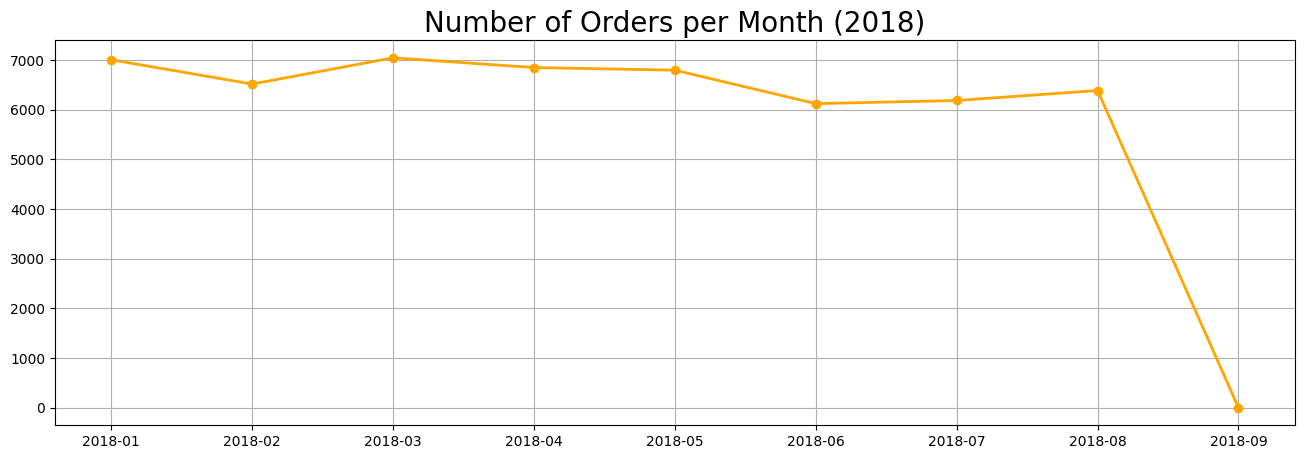

In [244]:
plt.figure(figsize=(16, 5)) 
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="orange") 
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 

plt.grid()
plt.show()

Dari hasil visualisasi tersebut dapat dilihat bahwa performa penjualan cukup baik dimana jumlah order terbanyak terjadi pda bulan januari dan maret. Selain itu juga dapat dilihat penurunan pada bulan februari, juni dan di bulan september. 


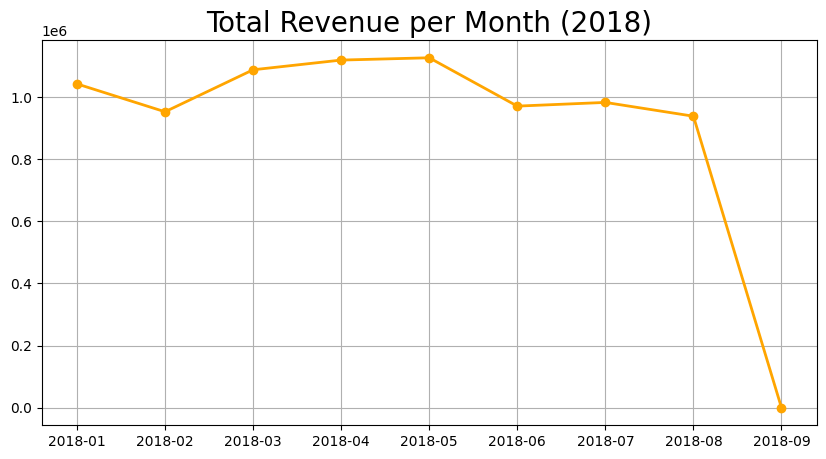

In [245]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["revenue"], marker='o', linewidth=2, color="orange"
)
plt.title("Total Revenue per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid()
plt.show()

Dari visualisasi ini kita bisa melihat performa dari revenue atau keuntung yang dihasilkan. Dapat dilihat penurunan yang cukup signifikan terjadi pada bulan februari, juni sampai bulan september. analisa lebih lanjut dapat dilakukan apabila memliki data yang cukup seperti musim, even, promo dan sebagainya yang terjadi pada bulan atau tahun tersebut.

## 2. Produk apa yang menghasilkan keuntungan terbesar dan terendah ?

In [246]:
product_profit = all_df.groupby('product_id')['total_price'].sum().reset_index()

#mencari produk terlaris
max_product_profit = product_profit[product_profit['total_price'] == product_profit['total_price'].max()]

#produk tidak laris
min_product_profit = product_profit[product_profit['total_price'] == product_profit['total_price'].min()]

print('Produk Terlaris', max_product_profit)
print('Produk Kurang Laris', min_product_profit)

Produk Terlaris                              product_id  total_price
23483  bb50f2e236e5eea0100680137654686c      70485.0
Produk Kurang Laris                             product_id  total_price
8999  46fce52cef5caa7cc225a5531c946c8b          2.2


In [247]:
product_profit = all_df.groupby('category_name')['total_price'].sum().reset_index()
product_profit.rename(columns={
    'category_name' : 'category_of_product',
    'total_price' : 'revenue'
}, inplace = True)
product_profit.sample(5)

,category_of_product,revenue
32,fashion_sport,2483.80
55,music,6059.32
9,books_imported,5258.22
21,costruction_tools_garden,31218.78
28,fashion_bags_accessories,165624.79


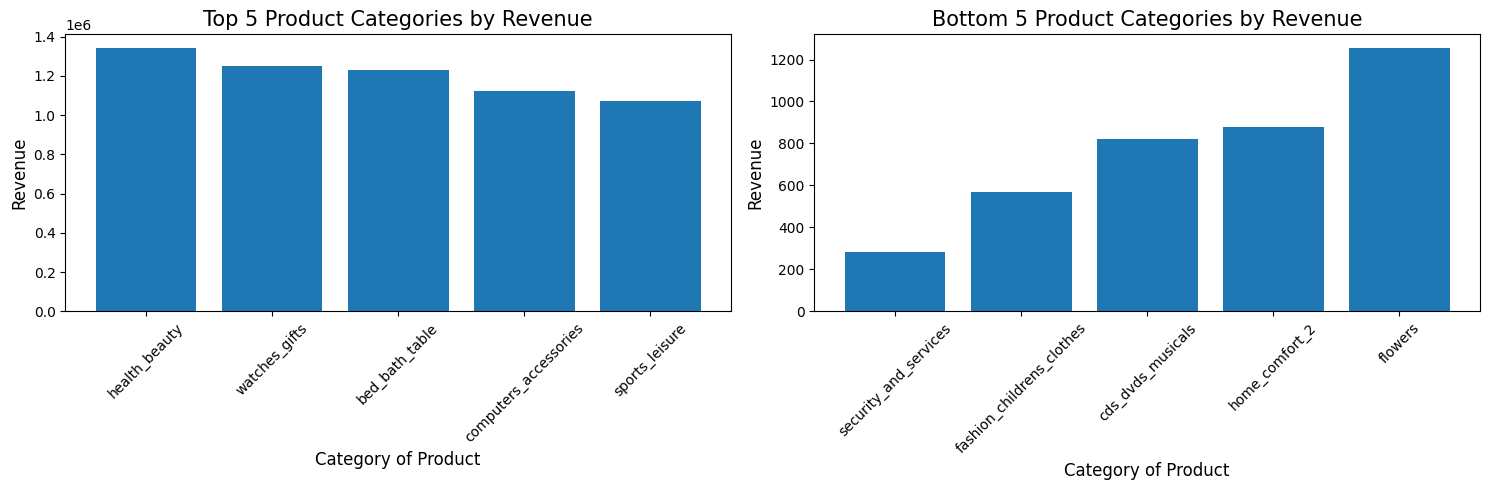

In [248]:
# Ambil 5 kategori produk teratas
top_5_product_profit = product_profit.nlargest(5, 'revenue')

# Ambil 5 kategori produk terendah
bottom_5_product_profit = product_profit.nsmallest(5, 'revenue')

# Buat gambar dengan dua subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: 5 kategori teratas
axes[0].bar(top_5_product_profit['category_of_product'], top_5_product_profit['revenue'])
axes[0].set_title("Top 5 Product Categories by Revenue", fontsize=15)
axes[0].set_xlabel("Category of Product", fontsize=12)
axes[0].set_ylabel("Revenue", fontsize=12)
axes[0].tick_params(axis='x', labelrotation=45)

# Plot 2: 5 kategori terendah
axes[1].bar(bottom_5_product_profit['category_of_product'], bottom_5_product_profit['revenue'])
axes[1].set_title("Bottom 5 Product Categories by Revenue", fontsize=15)
axes[1].set_xlabel("Category of Product", fontsize=12)
axes[1].set_ylabel("Revenue", fontsize=12)
axes[1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()

plt.show()

Dapat dilihat 5 kategori produk berdasarkan keuntungan. Untuk kategori produk health beauty menjadi kategori produk yang menghasilkan keuntungan tertinggi sedangkan untuk security and service menjadi kategori produk dengan keuntungan terendah. Selanjutnya kita melihat kategori produk apa yang paling banyak dan sedikit terjual.

## 3. Produk yang paling sering dan paling sedikit terjual ?

In [249]:
all_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_arrived_customer',
       'order_item_id', 'product_id', 'price', 'total_price', 'customer_city',
       'customer_state', 'status', 'category_name'],
      dtype='object')

In [250]:
sum_order_items_df = all_df.groupby("category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,category_name,order_item_id
0,bed_bath_table,13647
1,furniture_decor,11471
2,health_beauty,11044
3,sports_leisure,9877
4,computers_accessories,9805
5,housewares,8977
6,watches_gifts,6572
7,garden_tools,5839
8,telephony,5141
9,auto,4838


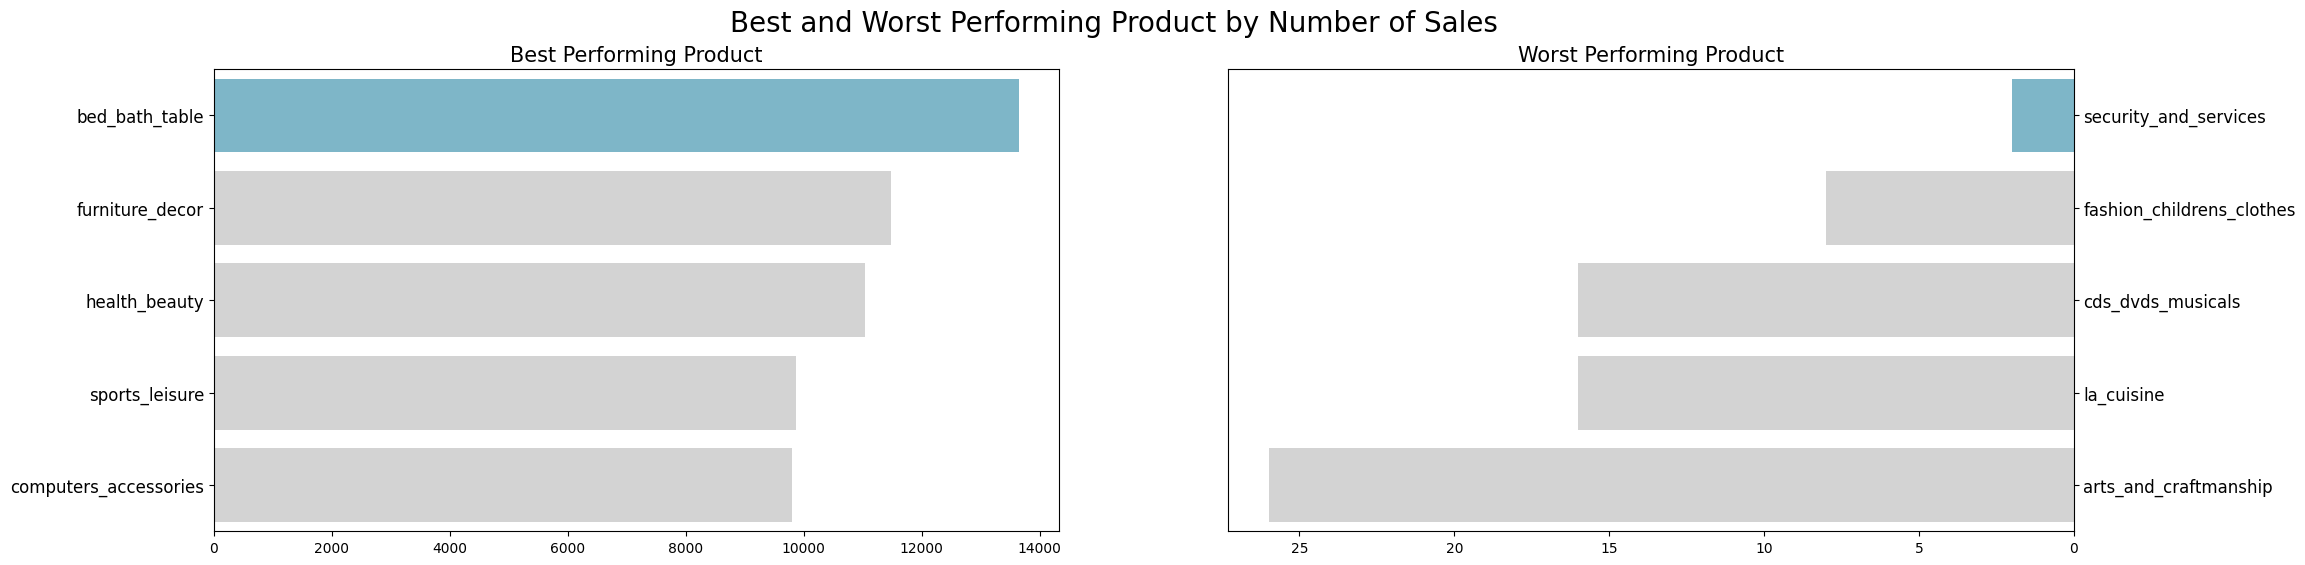

In [251]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="order_item_id", y="category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="order_item_id", y="category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

Dapat dilihat bahwa kategori produk bed_bath_table merupakan produk yang paling laris namun bukan kategori produk yang menghasilkan keuntungan tertinggi. Dan untuk kategori produk security and service merupakan produk yang paling tidak laris dan juga merupakan kategori produk yang tidak menghasilkan keuntungan.

## 4. Demografi pelanggan apa saja ?

In [252]:
all_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_arrived_customer',
       'order_item_id', 'product_id', 'price', 'total_price', 'customer_city',
       'customer_state', 'status', 'category_name'],
      dtype='object')

In [253]:
customer_city = all_df.groupby('customer_city')['customer_id'].count().reset_index()
customer_city.rename(columns={'customer_id': 'customer_count'}, inplace=True)
top_10_cities = customer_city.sort_values(by='customer_count', ascending=False).head(10)

print(top_10_cities)

              customer_city  customer_count
3575              sao paulo           17380
3135         rio de janeiro            7677
451          belo horizonte            3073
556                brasilia            2351
1139               curitiba            1725
704                campinas            1622
2944           porto alegre            1578
3227               salvador            1381
1523              guarulhos            1301
3408  sao bernardo do campo            1033


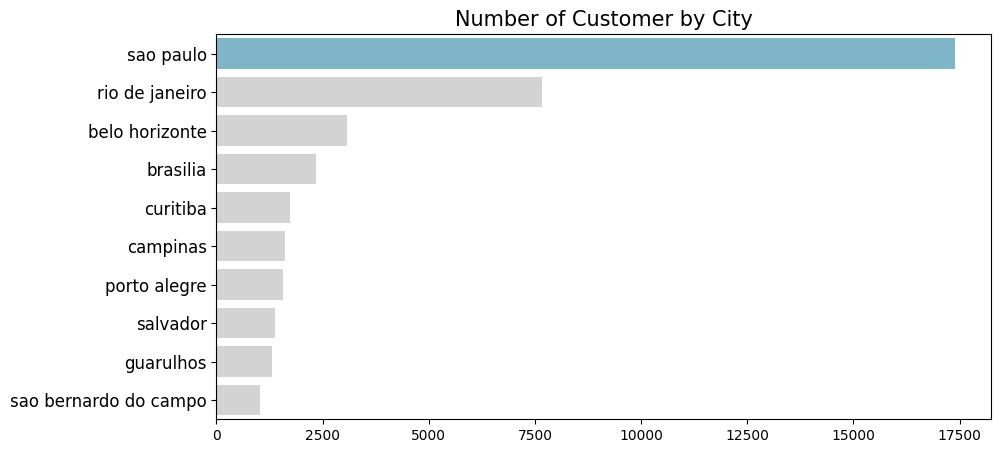

In [254]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_city",
    data=top_10_cities.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan visualisasi ini dapat kita lihat bahwa kota Sao Paulo merupakan kota yang paling banyak melakukan transaksi. Selanjutnya akan melakukan analisa perilaku pelanggan dengan mengunakan analisa RFM. 

## 5. Analisa RFM dari pelanggan tersebut ?

In [255]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

KeyError: "Column(s) ['order_date'] do not exist"

In [ ]:
recency = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
})
latest_date = recency['order_purchase_timestamp'].max()
recency['Recency'] = (latest_date - recency['order_purchase_timestamp']).dt.days
recency = recency.rename(columns={"latest_date":"Recency"})

recency.head()

,customer_id,order_purchase_timestamp,Recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,292
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,413
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,551
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,382
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,153


In [ ]:
frequency = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_id": "count", # mengambil tanggal order terakhir
})
frequency = frequency.rename(columns={"order_id": "Frequency"})
frequency.head()

,customer_id,Frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


In [ ]:
monetary = all_df.groupby(by="customer_id", as_index=False).agg({
    "total_price": "sum", # mengambil tanggal order terakhir
})
monetary = monetary.rename(columns={"total_price": "Monetary"})
monetary.head()

,customer_id,Monetary
0,00012a2ce6f8dcda20d059ce98491703,89.80
1,000161a058600d5901f007fab4c27140,54.90
2,0001fd6190edaaf884bcaf3d49edf079,179.99
3,0002414f95344307404f0ace7a26f1d5,149.90
4,000379cdec625522490c315e70c7a9fb,93.00


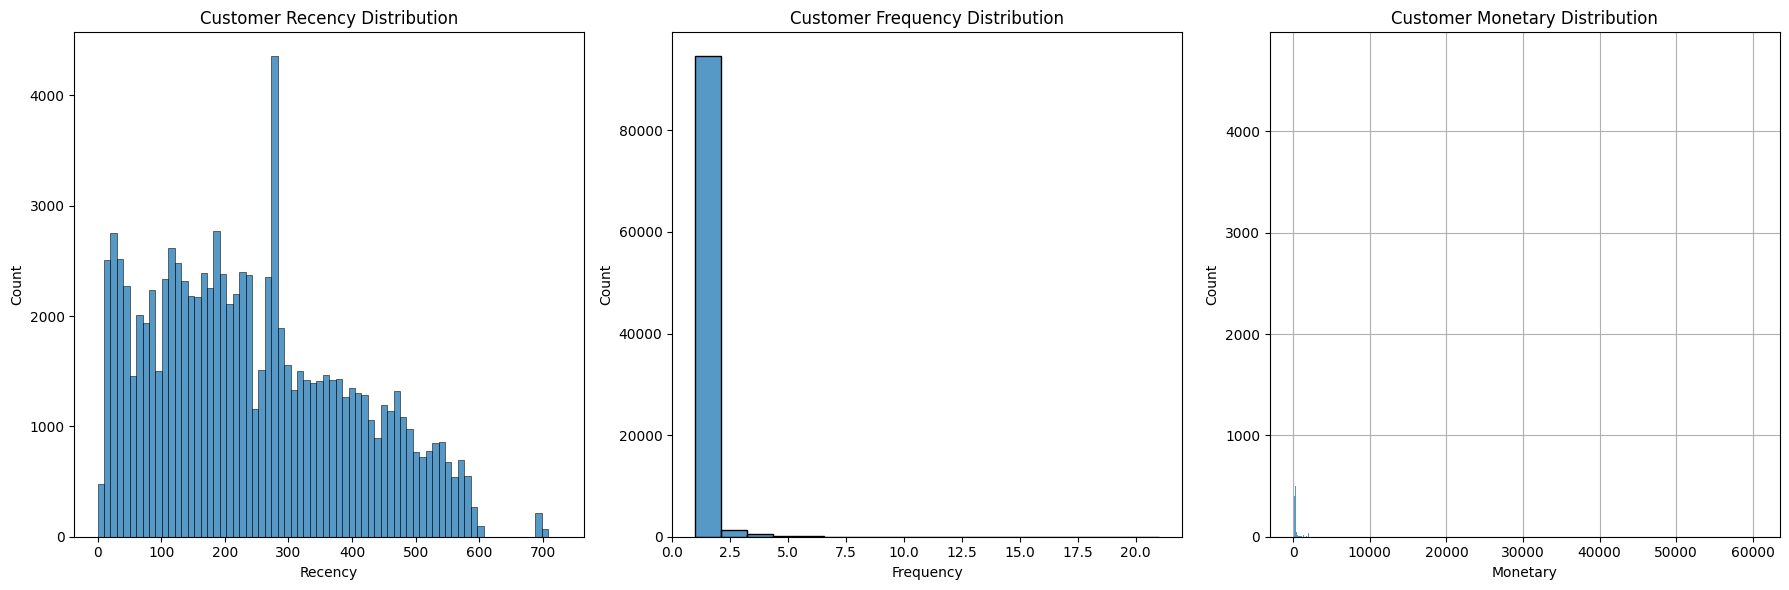

In [ ]:
# Create a 1x3 grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Recency histogram plot
sns.histplot(recency, ax=axes[0])
axes[0].set_title('Customer Recency Distribution')

# Frequency histogram plot
sns.histplot(frequency, ax=axes[1])
axes[1].set_title('Customer Frequency Distribution')

# Monetary histogram plot
sns.histplot(monetary, ax=axes[2])
axes[2].set_title('Customer Monetary Distribution')
axes[2].grid()

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

Dari visuaisasi ini dapat dilakukan analisa bahwa banyak pelanngan yang recency, frequency dan monetary pelanggan. Untuk melihat pelanggan tersebut masuk di cluster mana, sebaiknya dilakukan scaling terlebih dahulu agar variasi data lebih baik.

In [ ]:
# simpan data yang sudah dibersihkan
all_df.to_csv('Dashboard/main_data.csv')

# Conclusion

1. Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir? </br>
Dapat dilihat penurunan yang cukup signifikan terjadi pada bulan februari, juni sampai bulan september. Analisa lebih lanjut dapat dilakukan apabila memliki data yang cukup seperti musim, even, promo dan sebagainya yang terjadi pada bulan atau tahun tersebut.

2. Produk apa yang menghasilkan keuntungan terbesar dan terendah ? </br>
Untuk kategori produk health beauty menjadi kategori produk yang menghasilkan keuntungan tertinggi sedangkan untuk security and service menjadi kategori produk dengan keuntungan terendah.

3. Produk yang laris dan tidak ? </br>
Kategori produk bed_bath_table merupakan produk yang paling laris namun bukan kategori produk yang menghasilkan keuntungan tertinggi. Dan untuk kategori produk security and service merupakan produk yang paling tidak laris dan juga merupakan kategori produk yang tidak menghasilkan keuntungan.

4. Demografi pelanggan apa saja ? </br>
Kota Sao Paulo merupakan kota yang paling banyak melakukan transaksi.

5. Analisa RFM dari pelanggan tersebut ?
* Recency adalah metrik yang digunakan dalam analisis bisnis dan pemasaran untuk mengukur seberapa baru atau terakhir kali pelanggan melakukan interaksi atau transaksi dengan bisnis atau merek tertentu.
Dapat disimpulkan lebih banyak pelanggan yang aktif lebih dari 100 hari.

* Frequency adalah metrik yang digunakan untuk mengukur seberapa sering pelanggan melakukan pembelian atau interaksi dengan bisnis dalam periode waktu tertentu. 
Dapat disimpulkan dari visualisai bahwa pelanggan cukup aktif berbelanja.

* Monetary adalah mengukur seberapa banyak uang yang telah dihabiskan oleh pelanggan dalam berbelanja.
Dapat disimpulkan banyak pelanggan yang menghabiskan uangnya berbelanja untuk barang dengan harga yang relatif murah.